#HW2 (584) Credit Risk Prediction
""" 
The objective of this assignment are the following: 

Experiment with various classification models.
Think about dealing with data with different attribute types: categorical and numerical (ratio).
Think about dealing with potentially sensitive or protected attributes like gender, race, age
Think about dealing with imbalanced data i.e., class labels with varying distribution
F1 Scoring Metric

AIM: Develop predictive models that can determine someone’s credit risk 0 - high risk, 1-low risk .
--

The goal of this competition is to allow you to develop predictive models that can determine given a particular individual whether their credit risk is high denoted by 0 or low denoted by1.  As such, the goal would be to develop the best binary classification model.

Since the dataset is imbalanced the scoring function will be the F1-score instead of Accuracy.

Caveats:

+ Remember not all features will be good for predicting credit risk. Think of feature selection, engineering, reduction

+ The dataset has an imbalanced distribution i.e., within the training set there are 24720 (0) and 7841 (1). No information is provided for the test set regarding the distribution.

+ Use your data mining knowledge till now, wisely to optimize your results.
--------------------------------

Data Description:

The training dataset consists of 32561 records and the test dataset consists of 13305 records. We provide you with the training class labels and the test labels are held out.

In the training file there are 13th attributes with the 13-th attribute (or column) being the class label of interest. In the testing file there are 12 attributes.

train.csv
Description
"""
id - unique identifier - UID
F1 - Continuous value describing number of years since last degree was completed- YEARS_TO_LAST_DEGREE
F2 - Continuous value indicating hours worked per week -WORK_HOURS_PER_WEEK
F3 - Categorical Value - CAT_VALUE
F4 - Categorical Value indicating type of occupation -CAT_VALUE_OCCUPATION
F5 - continuous value denoting gains -GAINS
F6 - continuous value denoting loss - LOSS
F7 - Categorical value denoting marital status -MARITAL_STATUS
F8 - Categorical value denoting type of employment (e.g., Self) -TYPE_EMPLOYMENT
F9 - Categorical Value denoting education type -TYPE_EDUCATION
F10 - Categorical Value denoting different race -TYPE_RACE
F11 - Categorical - Female/Male -TYPE_GENDER
credit - 0: Bad, 1: Good -CREDIT_RISK
"""

In [68]:
# Import all the Libraries
import re
import timeit
import unicodedata
import matplotlib.pylab as plt
import nltk
import numpy as np
import pandas as pd

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import  SMOTENC

In [80]:
# Read the file and store the data
def readTrainfile(filepath):
    read_data = pd.read_csv(filepath, names=['UID', 'YEARS_TO_LAST_DEGREE','WORK_HOURS_PER_WEEK','CAT_VALUE', 'CAT_VALUE_OCCUPATION','GAINS','LOSS','MARITAL_STATUS','TYPE_EMPLOYMENT','TYPE_EDUCATION','TYPE_RACE','TYPE_GENDER','CREDIT_RISK'], sep=',',header=1)
    return read_data

# Save the file the output file
def saveOutput(filePath, data):
    # writing to .txt
    np.savetxt(filePath, data, fmt='%s')

In [81]:
trainingData=readTrainfile("credit_train.csv")
trainingData

,UID,YEARS_TO_LAST_DEGREE,WORK_HOURS_PER_WEEK,CAT_VALUE,CAT_VALUE_OCCUPATION,GAINS,LOSS,MARITAL_STATUS,TYPE_EMPLOYMENT,TYPE_EDUCATION,TYPE_RACE,TYPE_GENDER,CREDIT_RISK
0,1,13,13,0,4,0,0,2,6,9,White,Male,0
1,2,9,40,1,6,0,0,0,4,11,White,Male,0
2,3,7,40,0,6,0,0,2,4,1,Black,Male,0
3,4,13,40,5,10,0,0,2,4,9,Black,Female,0
4,5,14,40,5,4,0,0,2,4,12,White,Female,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,32556,12,38,5,13,0,0,2,4,7,White,Female,0
32556,32557,9,40,0,7,0,0,2,4,11,White,Male,1
32557,32558,9,40,4,1,0,0,6,4,11,White,Female,0
32558,32559,9,20,3,1,0,0,4,4,11,White,Male,0


"""
Categorical- 
PROCESSING AS ONE HOT ENCODING
F3 - Categorical Value - CAT_VALUE
F4 - Categorical Value indicating type of occupation -CAT_VALUE_OCCUPATION
F7 - Categorical value denoting marital status -MARITAL_STATUS
F8 - Categorical value denoting type of employment (e.g., Self) -TYPE_EMPLOYMENT
F9 - Categorical Value denoting education type -TYPE_EDUCATION
F10 - Categorical Value denoting different race -TYPE_RACE 
-- 
PROCESSING AS BOOLEAN
F11 - Categorical - Female/Male -TYPE_GENDER 
Continuous
F1 - Continuous value describing number of years since last degree was completed- YEARS_TO_LAST_DEGREE
F2 - Continuous value indicating hours worked per week -WORK_HOURS_PER_WEEK
F5 - continuous value denoting gains -GAINS
F6 - continuous value denoting loss - LOSS

CLASS
credit - 0: Bad, 1: Good -CREDIT_RISK
"""

In [72]:
trainingData.groupby(['CREDIT_RISK', 'MARITAL_STATUS']).size().reset_index().pivot(columns='CREDIT_RISK', index='MARITAL_STATUS', values=0)

CREDIT_RISK,0,1
MARITAL_STATUS,,
0,3980,463
1,13,10
2,8284,6692
3,384,34
4,10191,491
5,959,66
6,908,85


In [77]:
trainingData.groupby(['CREDIT_RISK', 'TYPE_RACE']).size().reset_index().pivot(columns='CREDIT_RISK', index='TYPE_RACE', values=0)

CREDIT_RISK,0,1
TYPE_RACE,,
Amer-Indian-Eskimo,275,36
Asian-Pac-Islander,763,276
Black,2737,387
Other,246,25
White,20698,7117


In [116]:
trainingData.corr()

,UID,YEARS_TO_LAST_DEGREE,WORK_HOURS_PER_WEEK,CAT_VALUE,CAT_VALUE_OCCUPATION,GAINS,LOSS,MARITAL_STATUS,TYPE_EMPLOYMENT,TYPE_EDUCATION,CREDIT_RISK
UID,1.000000,-0.001019,0.000605,-0.004070,-0.001500,0.001680,-0.001200,-0.000352,-0.000051,-0.006715,0.005374
YEARS_TO_LAST_DEGREE,-0.001019,1.000000,0.148127,-0.094145,0.109748,0.122627,0.079932,-0.069338,0.052015,0.359172,0.335182
WORK_HOURS_PER_WEEK,0.000605,0.148127,1.000000,-0.248975,0.080384,0.078409,0.054256,-0.190521,0.138974,0.055510,0.229690
CAT_VALUE,-0.004070,-0.094145,-0.248975,1.000000,-0.075620,-0.057918,-0.061064,0.185461,-0.090449,-0.010879,-0.250924
CAT_VALUE_OCCUPATION,-0.001500,0.109748,0.080384,-0.075620,1.000000,0.025511,0.017979,-0.009617,0.255004,-0.021274,0.075448
GAINS,0.001680,0.122627,0.078409,-0.057918,0.025511,1.000000,-0.031614,-0.043398,0.033828,0.030047,0.223333
LOSS,-0.001200,0.079932,0.054256,-0.061064,0.017979,-0.031614,1.000000,-0.034182,0.012231,0.016744,0.150523
MARITAL_STATUS,-0.000352,-0.069338,-0.190521,0.185461,-0.009617,-0.043398,-0.034182,1.000000,-0.064798,-0.038398,-0.199295
TYPE_EMPLOYMENT,-0.000051,0.052015,0.138974,-0.090449,0.255004,0.033828,0.012231,-0.064798,1.000000,0.023537,0.051645
TYPE_EDUCATION,-0.006715,0.359172,0.055510,-0.010879,-0.021274,0.030047,0.016744,-0.038398,0.023537,1.000000,0.079311


In [76]:
trainingData.groupby(['CREDIT_RISK', 'TYPE_GENDER']).size().reset_index().pivot(columns='CREDIT_RISK', index='TYPE_GENDER', values=0)

CREDIT_RISK,0,1
TYPE_GENDER,,
Female,9592,1179
Male,15127,6662


In [6]:
from sklearn.preprocessing import RobustScaler
#Do one hot encoding for the column_Name 
def ONE_HOT_ENCODING(dataset, column_Name, prefix, remove_Original):
    new_columns=pd.get_dummies(dataset[column_Name],prefix=prefix)
    if(remove_Original):
        dataset=dataset.drop(columns=[column_Name])
    dataset=pd.concat([dataset, new_columns], axis=1)
    #print(dataset)
    return dataset

# Split a dataset into k folds
def cross_validation_split(dataset, n_folds):
    dataset = dataset.dropna()
    dataset = dataset.reset_index(drop=True)
    X, y = dataset.drop(['CREDIT_RISK'],axis=1), dataset['CREDIT_RISK']
    skf = StratifiedKFold(n_splits=n_folds)
    #print(X,y)
    dataset_folds = list()
    for training_set_idx, test_set_idx in skf.split(X, y):
        fold = {"training_set_X": X.iloc[training_set_idx], "test_set_X": X.iloc[test_set_idx],
                "training_set_Y": y.iloc[training_set_idx], "test_set_Y": y.iloc[test_set_idx],
                "test_idx": test_set_idx}
        dataset_folds.append(fold)
    return dataset_folds

#Do one hot encoding and binary conversion of data 
def clean_data(processed_data):
    #CONVERTING CATEGORICAL_COULMNS VIA ONE_HOT_ENCODING
    CATEGORICAL_COULMNS=["CAT_VALUE","CAT_VALUE_OCCUPATION","MARITAL_STATUS","TYPE_EMPLOYMENT", "TYPE_EDUCATION","TYPE_RACE"]    #    CATEGORICAL_COULMNS=["CAT_VALUE","CAT_VALUE_OCCUPATION","MARITAL_STATUS","TYPE_EMPLOYMENT", "TYPE_EDUCATION","TYPE_RACE"]
    for col in CATEGORICAL_COULMNS:
        processed_data=ONE_HOT_ENCODING(processed_data,col,col,True)
    #CONVERTING GENDER TO BINARY
    IS_FEMALE = {' Male': 0,' Female': 1}
    processed_data.TYPE_GENDER = [IS_FEMALE[item] for item in processed_data.TYPE_GENDER]
    processed_data=processed_data.rename(columns={'TYPE_GENDER':'IS_FEMALE'})
    processed_data=processed_data.drop(columns=['UID'])
    cols_to_norm = ['YEARS_TO_LAST_DEGREE','WORK_HOURS_PER_WEEK','GAINS','LOSS']
    processed_data[cols_to_norm] = RobustScaler().fit_transform(processed_data[cols_to_norm])
    return processed_data

In [83]:
training_processing_data=trainingData.copy()
# Drop the null columns where all values are null
training_processing_data = training_processing_data.dropna(axis='columns', how='all')
# Drop the null rows
training_processing_data = training_processing_data.dropna()
training_processing_data=clean_data(training_processing_data)
num_cols_cat= list(range(6, 63))

In [125]:
# Evaluate using StratifiedKFold
def evaluate_training_algorithm(algo,algoName,dataset, n_folds):
    folds = cross_validation_split(dataset, n_folds)
    accuracy = 0
    i = 0
    score = dict()
    data=list();
    for fold in folds:
        data.append(Classification_Algo_Training(algo,fold,algoName))
    score[algoName]=data
    return score
def Classification_Algo_Training(algo, Dataset,name):
    X_test=Dataset["test_set_X"]
    X_train=Dataset["training_set_X"]
    y_train=Dataset["training_set_Y"]
    y_test=Dataset["test_set_Y"]
    predictedOutput=dict()
    sm = SMOTENC(random_state=42, categorical_features=num_cols_cat) #69
    X_train, y_train = sm.fit_resample(X_train, y_train)
    algo.fit(X_train, y_train)
    y_predicted = algo.predict(X_test)
    fs=f1_score(y_test, y_predicted)
    print("%s:" % name)
    print("F1 Score: %1.3f\n" % fs)
    print(y_predicted)
    return fs
LogisticRegressionData=evaluate_training_algorithm(LogisticRegression(),"LogisticRegression",training_processing_data,5)
GaussianNBData=evaluate_training_algorithm(GaussianNB(),"GaussianNB",training_processing_data,5)
LinearSVCData=evaluate_training_algorithm(LinearSVC(C=1.0),"LinearSVC",training_processing_data,5)
RandomForestClassifierData=evaluate_training_algorithm(RandomForestClassifier(max_depth=5, random_state=0,bootstrap=False,max_features=None),"RandomForestClassifier",training_processing_data,5)
KNeighborsClassifierData=evaluate_training_algorithm(KNeighborsClassifier(n_neighbors=21),"KNeighborsClassifier",training_processing_data,5)
AdaBoostClassifierData=evaluate_training_algorithm(AdaBoostClassifier(),"AdaBoostClassifier",training_processing_data,5)
GradientBoostingClassifierData=evaluate_training_algorithm(GradientBoostingClassifier(max_depth=10,max_features=None),"GradientBoostingClassifier",training_processing_data,5)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression:
F1 Score: 0.651

[1 0 0 ... 1 0 0]


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression:
F1 Score: 0.651

[1 1 1 ... 1 1 1]


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression:
F1 Score: 0.657

[1 1 0 ... 0 0 1]


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression:
F1 Score: 0.660

[0 0 0 ... 1 1 0]


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression:
F1 Score: 0.664

[0 1 0 ... 0 0 1]
GaussianNB:
F1 Score: 0.640

[1 0 0 ... 1 0 0]
GaussianNB:
F1 Score: 0.639

[1 1 1 ... 1 1 1]
GaussianNB:
F1 Score: 0.639

[1 1 0 ... 1 0 1]
GaussianNB:
F1 Score: 0.646

[0 0 0 ... 1 1 1]
GaussianNB:
F1 Score: 0.652

[0 1 0 ... 0 0 1]


/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVC:
F1 Score: 0.631

[1 0 0 ... 1 0 0]


/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVC:
F1 Score: 0.654

[1 1 1 ... 1 1 1]


/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVC:
F1 Score: 0.674

[1 1 0 ... 0 0 1]


/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVC:
F1 Score: 0.654

[0 0 0 ... 1 1 1]


/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVC:
F1 Score: 0.580

[1 1 0 ... 0 0 0]
RandomForestClassifier:
F1 Score: 0.649

[1 0 0 ... 1 0 0]
RandomForestClassifier:
F1 Score: 0.640

[1 1 1 ... 1 1 1]
RandomForestClassifier:
F1 Score: 0.645

[1 1 0 ... 0 1 1]
RandomForestClassifier:
F1 Score: 0.644

[0 0 0 ... 1 1 1]
RandomForestClassifier:
F1 Score: 0.652

[0 1 1 ... 0 0 1]
KNeighborsClassifier:
F1 Score: 0.667

[1 0 0 ... 1 0 0]
KNeighborsClassifier:
F1 Score: 0.673

[1 1 1 ... 1 1 1]
KNeighborsClassifier:
F1 Score: 0.663

[1 0 0 ... 0 0 1]
KNeighborsClassifier:
F1 Score: 0.680

[0 0 0 ... 1 1 1]
KNeighborsClassifier:
F1 Score: 0.674

[1 1 0 ... 0 0 1]
AdaBoostClassifier:
F1 Score: 0.679

[1 0 0 ... 1 0 0]
AdaBoostClassifier:
F1 Score: 0.674

[1 1 1 ... 1 1 1]
AdaBoostClassifier:
F1 Score: 0.681

[1 1 0 ... 0 0 1]
AdaBoostClassifier:
F1 Score: 0.691

[0 0 0 ... 1 1 1]
AdaBoostClassifier:
F1 Score: 0.689

[0 1 0 ... 0 0 1]
GradientBoostingClassifier:
F1 Score: 0.693

[1 0 0 ... 1 0 0]
GradientBoostingClassifier:
F1 Score

In [126]:
Algos=["LogisticRegression","GaussianNB","RandomForestClassifier","KNeighborsClassifier","AdaBoostClassifier","GradientBoostingClassifier","HistGradientBoostingClassifierData"]
print("LogisticRegression", np.average(LogisticRegressionData['LogisticRegression']))
print("GaussianNB", np.average(GaussianNBData['GaussianNB']))
print("LinearSVC", np.average(LinearSVCData['LinearSVC']))
print("RandomForestClassifier", np.average(RandomForestClassifierData['RandomForestClassifier']))
print("KNeighborsClassifier",np.average(KNeighborsClassifierData['KNeighborsClassifier']))
print("AdaBoostClassifier", np.average(AdaBoostClassifierData['AdaBoostClassifier']))
print("GradientBoostingClassifier",np.average(GradientBoostingClassifierData['GradientBoostingClassifier']))


LogisticRegression 0.6566836305022689
GaussianNB 0.6432987595066393
LinearSVC 0.6387325683843275
RandomForestClassifier 0.6459786591009992
KNeighborsClassifier 0.6713221272228602
AdaBoostClassifier 0.6826596941113323
GradientBoostingClassifier 0.6939679493236579


In [127]:
algos=["LogisticRegression"
       ,"GaussianNB"
       ,"LinearSVC"
       ,"RandomForestClassifier"
       ,"KNeighborsClassifier"
       ,"AdaBoostClassifier"
       ,"GradientBoostingClassifier"]
Accuracies=[np.average(LogisticRegressionData['LogisticRegression'])
            ,np.average(GaussianNBData['GaussianNB'])
            ,np.average(LinearSVCData['LinearSVC'])
            ,np.average(RandomForestClassifierData['RandomForestClassifier'])
            ,np.average(KNeighborsClassifierData['KNeighborsClassifier'])
            ,np.average(AdaBoostClassifierData['AdaBoostClassifier'])
            ,np.average(GradientBoostingClassifierData['GradientBoostingClassifier'])]

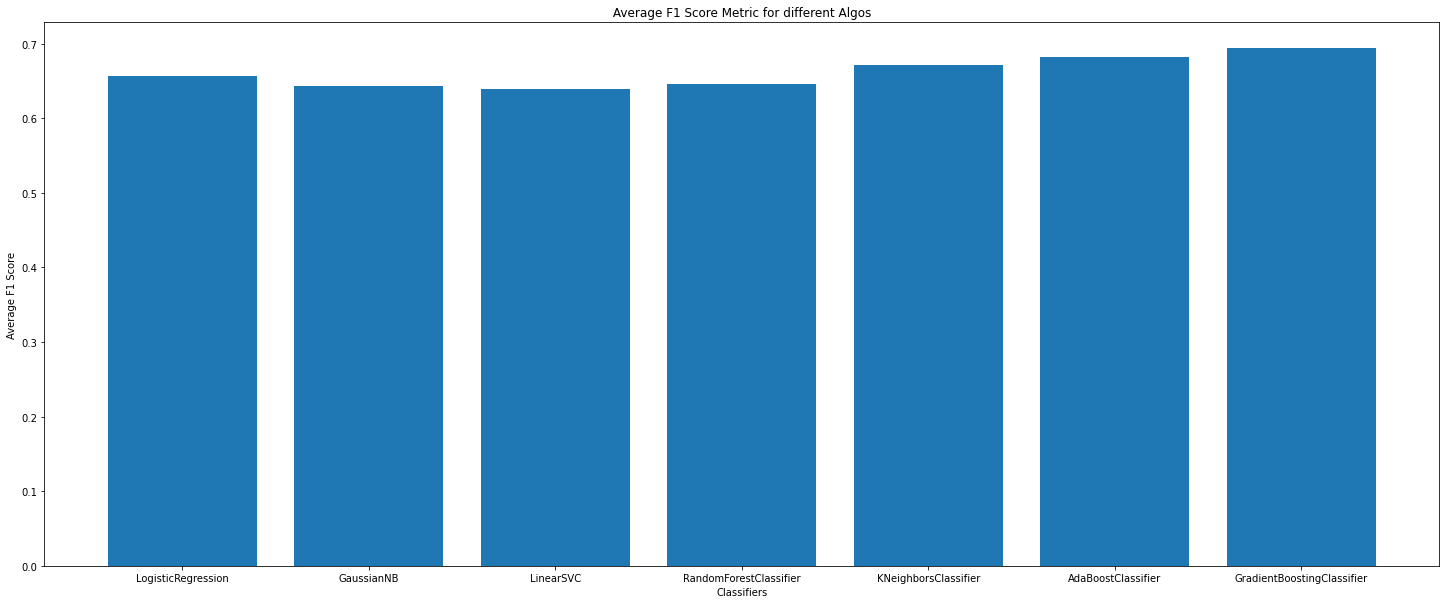

In [128]:
fig = plt.figure(figsize = (25, 10)) 
plt.bar(algos,Accuracies)
plt.xlabel("Classifiers")
plt.ylabel("Average F1 Score")
plt.title(" Average F1 Score Metric for different Algos ")
plt.show()

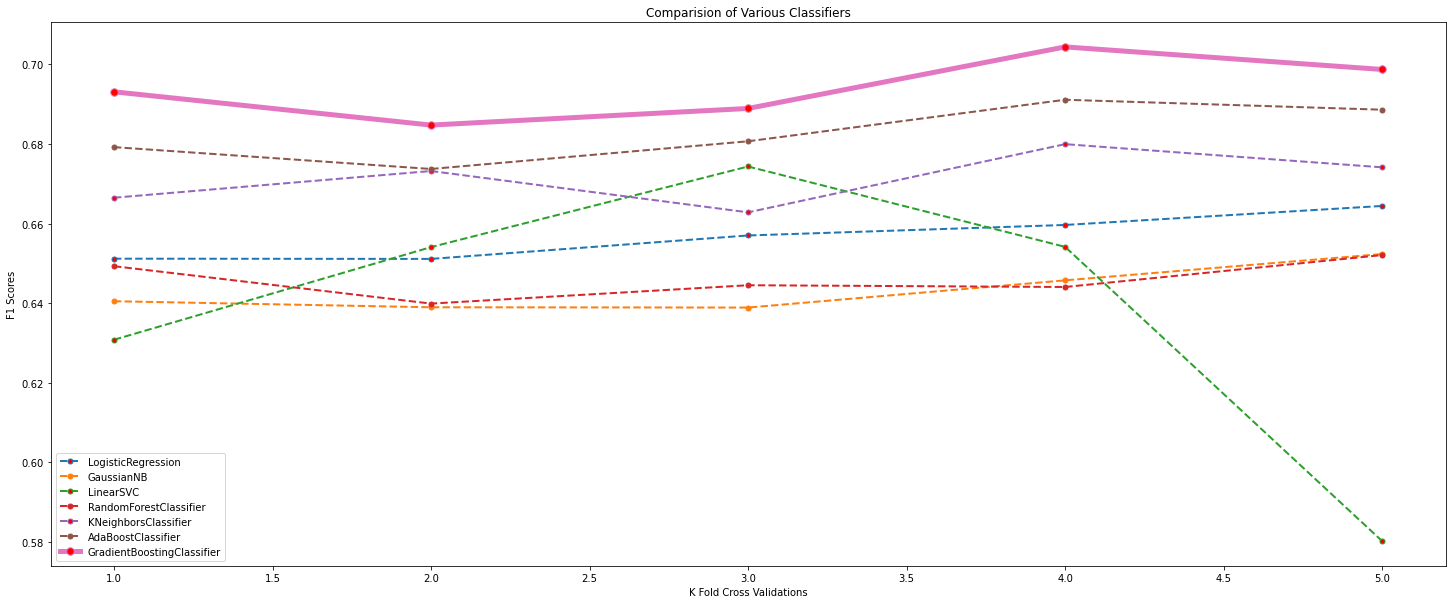

In [129]:
Xaxis=[]
for k in range(1, 6, 1):
    Xaxis.append(k)
fig = plt.figure(figsize = (25, 10)) 
plt.plot(Xaxis, LogisticRegressionData['LogisticRegression'], linestyle='dashed', linewidth=2,
                 marker='.', markerfacecolor='red', markersize=10, label = "LogisticRegression")
plt.plot(Xaxis, GaussianNBData['GaussianNB'],  linestyle='dashed', linewidth=2,
                 marker='.', markersize=10, label = "GaussianNB")
plt.plot(Xaxis, LinearSVCData['LinearSVC'], linestyle='dashed', linewidth=2,
                 marker='.', markerfacecolor='red', markersize=10, label = "LinearSVC")
plt.plot(Xaxis, RandomForestClassifierData['RandomForestClassifier'],  linestyle='dashed', linewidth=2,
                 marker='.', markersize=10, label = "RandomForestClassifier")
plt.plot(Xaxis, KNeighborsClassifierData['KNeighborsClassifier'], linestyle='dashed', linewidth=2,
                 marker='.', markerfacecolor='red', markersize=10, label = "KNeighborsClassifier")
plt.plot(Xaxis, AdaBoostClassifierData['AdaBoostClassifier'],  linestyle='dashed', linewidth=2,
                 marker='.', markersize=10, label = "AdaBoostClassifier")
plt.plot(Xaxis, GradientBoostingClassifierData['GradientBoostingClassifier'], linewidth=5,
                 marker='.', markerfacecolor='red', markersize=15, label = "GradientBoostingClassifier")
# naming the x axis
plt.xlabel('K Fold Cross Validations')
# naming the y axis
plt.ylabel('F1 Scores')
# setting x axis range
# giving a title to the graph
plt.title('Comparision of Various Classifiers')
plt.legend()
plt.show()